In [16]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import math
import seaborn as sns
import sklearn
from sklearn import linear_model
from sklearn import preprocessing
%matplotlib inline

LASSO -- Least Absolut Shrinkage and Selection Operator. 

* Works by forcing the small parameter estimates to equal zero, more or less dropping them from the model. Handy when you're dealing with thousands of predictors and need to optimize efficiency. 

In [29]:
# Load the data again, drop the index column
# and any missing data columns.
df = pd.read_csv(
    'https://vincentarelbundock.github.io/Rdatasets/csv/ISLR/Default.csv'
).iloc[:,1:].dropna()

In [30]:
df.head(10)

,default,student,balance,income
0,No,No,729.526495,44361.625074
1,No,Yes,817.180407,12106.134700
2,No,No,1073.549164,31767.138947
3,No,No,529.250605,35704.493935
4,No,No,785.655883,38463.495879
5,No,Yes,919.588530,7491.558572
6,No,No,825.513331,24905.226578
7,No,Yes,808.667504,17600.451344
8,No,No,1161.057854,37468.529288
9,No,No,0.000000,29275.268293


In [31]:
#recode strings to numeric
df['default'] = np.where(df['default']=='Yes', 1, 0)
df['student'] = np.where(df['student']=='Yes', 1, 0)
names = df.columns
df = pd.DataFrame(preprocessing.scale(df), columns=names)

In [33]:
# Define the training and test sizes.
trainsize = int(df.shape[0] / 2)
df_test = df.iloc[trainsize:, :].copy()
df_train = df.iloc[:trainsize, :].copy()

Y_train = df_train['income'].values.reshape(-1, 1)
X_train = df_train.loc[:, ~(df_train.columns).isin(['income'])]

# Make some new features to capture potential quadratic and cubic
# relationships between student and balance.
df_train['balance_student'] = df_train['balance'] * df_train['student']
df_train['balance_default'] = df_train['balance'] * df_train['default']
df_train['student_default'] = df_train['student'] * df_train['default']
df_train['balance_sqrt'] = (df_train['balance'] + 100) ** .5
df_train['balance2'] = (df_train['balance'] + 100) ** 2
df_train['balance3'] = (df_train['balance'] + 100) ** 3

X_train2 = df_train.loc[:, ~(df_train.columns).isin(['income'])]

# Test the simpler model with smaller coefficients.
Y_test = df_test['income'].values.reshape(-1, 1)
X_test = df_test.loc[:, ~(df_test.columns).isin(['income'])]

# Test the more complex model with larger coefficients.
df_test['balance_student'] = df_test['balance'] * df_test['student']
df_test['balance_default'] = df_test['balance'] * df_test['default']
df_test['student_default'] = df_test['student'] * df_test['default']
df_test['balance_sqrt'] = (df_test['balance'] + 100) ** .5
df_test['balance2'] = (df_test['balance'] + 100) ** 2
df_test['balance3'] = (df_test['balance'] + 100) ** 3
X_test2 = df_test.loc[:, ~(df_test.columns).isin(['income'])]


In [34]:
# Small number of parameters.
lass = linear_model.Lasso(alpha=.35)
lassfit = lass.fit(X_train, Y_train)
print('R² for the model with few features:')
print(lass.score(X_train, Y_train))
origparams = np.append(lassfit.coef_, lassfit.intercept_)
print('\nParameter estimates for the model with few features:')
print(origparams)

# Large number of parameters.
lassBig = linear_model.Lasso(alpha=.35)
lassBig.fit(X_train2, Y_train)
print('\nR² for the model with many features:')
print(lassBig.score(X_train2, Y_train))
origparams = np.append(lassBig.coef_, lassBig.intercept_)
print('\nParameter estimates for the model with many features:')
print(origparams)

R² for the model with few features:
0.450062579301

Parameter estimates for the model with few features:
[-0.         -0.40657726 -0.          0.00114596]

R² for the model with many features:
0.443633767129

Parameter estimates for the model with many features:
[  0.00000000e+00  -3.89351238e-01   0.00000000e+00  -0.00000000e+00
   0.00000000e+00  -0.00000000e+00   0.00000000e+00  -2.77688887e-04
  -7.09158792e-07   3.48711577e+00]


In [35]:
print(lass.score(X_test, Y_test))

print(lassBig.score(X_test2, Y_test))

0.445532251512
0.438046634591


## Regularization parameter: Lasso

The $\lambda$ for lasso can var between 0 (no penalty, acts like OLS) and infinity.  If $\lambda$ is too large, all parameters will be set to zero.  

Create a plot below of how $R^2$ varies across different values of $\lambda$ for ridge and lasso regression. Use logic and code similar to the ridge regression demonstration above, and base your plot on the X_train2 feature set.

Do lasso and ridge yield the same $R^2$ for a given lambda value?

Submit your work and discuss the results with your mentor.

In [36]:
#Loop over various lambdas

#ridge regressions
ridge_reg = []
ridge_alpha = np.linspace(0.01, 1, 25)
for alpha in ridge_alpha:
    ridgeBig = linear_model.Ridge(alpha, fit_intercept = False)
    ridgeBig.fit(X_train2, Y_train)
    ridge_reg.append(ridgeBig.score(X_train2, Y_train))
    
#lasso regression
lasso_reg = []
lasso_alpha = np.linspace(0.01, 1, 25)
for alpha in lasso_alpha:
    lassoBig = linear_model.Lasso(alpha)
    lassoBig.fit(X_train2, Y_train)
    lasso_reg.append(lassoBig.score(X_train2, Y_train))

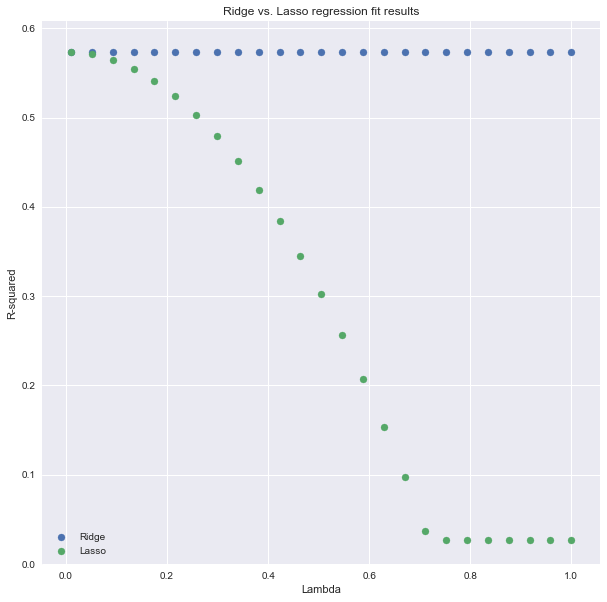

In [37]:
#display results
plt.figure(figsize = (10, 10))
plt.scatter(ridge_alpha, ridge_reg, label='Ridge')
plt.scatter(lasso_alpha, lasso_reg, label ='Lasso')
plt.xlabel('Lambda')
plt.ylabel('R-squared')
plt.title('Ridge vs. Lasso regression fit results')
plt.legend()
plt.show()

The accuracy of **ridge** is pretty stable as lambda increases

In [38]:
ridgeBig = linear_model.Ridge(alpha = 0.1)
ridgeBig.fit(X_train2, Y_train)

ridge_origparams_1 = np.append(ridgeBig.coef_, ridgeBig.intercept_)
print("alpha = 0.01: \n {}".format(ridge_origparams_1))

ridgeBig = linear_model.Ridge(alpha = 0.75)
ridgeBig.fit(X_train2, Y_train)

ridge_origparams_2 = np.append(ridgeBig.coef_, ridgeBig.intercept_)
print("alpha = 0.75: \n {}".format(ridge_origparams_2))

alpha = 0.01: 
 [ -5.55954938e-03  -7.58938867e-01   2.37415461e-03  -1.55888009e-03
   1.27553697e-02  -4.45497298e-03   2.20233010e-04   5.75217702e-03
  -3.83860090e-05  -1.91375867e+01]
alpha = 0.75: 
 [ -5.53452956e-03  -7.58830325e-01   3.66729198e-04  -1.58082780e-03
   1.27431675e-02  -4.44883632e-03   3.25055845e-05   5.76753271e-03
  -3.84220089e-05  -1.92532617e+01]


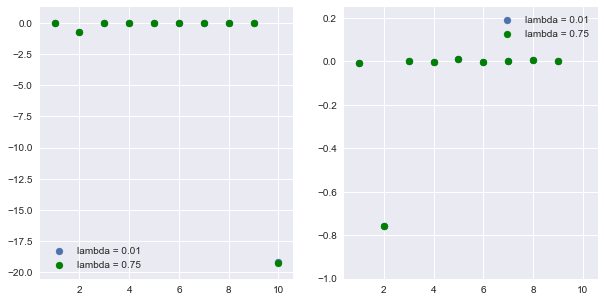

In [40]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.scatter(range(1, 11), ridge_origparams_1, label='lambda = 0.01')
plt.scatter(range(1, 11), ridge_origparams_2, label='lambda = 0.75', color='green')
plt.legend()

plt.subplot(1,2,2)
plt.scatter(range(1, 11), ridge_origparams_1, label='lambda = 0.01')
plt.scatter(range(1, 11), ridge_origparams_2, label='lambda = 0.75', color='green')
plt.ylim([-1, 0.25])
plt.legend()
plt.show()

In [41]:
lassoBig = linear_model.Lasso(alpha = 0.01)
lassoBig.fit(X_train2, Y_train)

lasso_origparams_1 = np.append(lassoBig.coef_, lassoBig.intercept_)
print("alpha = 0.01: \n {}".format(lasso_origparams_1))

lassoBig = linear_model.Lasso(alpha = 0.75)
lassoBig.fit(X_train2, Y_train)

lasso_origparams_2 = np.append(lassoBig.coef_, lassoBig.intercept_)
print("alpha = 0.75: \n {}".format(lasso_origparams_2))

alpha = 0.01: 
 [  0.00000000e+00  -7.49175475e-01   0.00000000e+00  -0.00000000e+00
   4.64868670e-03  -0.00000000e+00   0.00000000e+00  -0.00000000e+00
  -1.45217294e-09  -1.52452354e-03]
alpha = 0.75: 
 [  0.00000000e+00  -0.00000000e+00   0.00000000e+00  -0.00000000e+00
   0.00000000e+00  -0.00000000e+00   0.00000000e+00   0.00000000e+00
  -5.42660058e-06   5.43077199e+00]


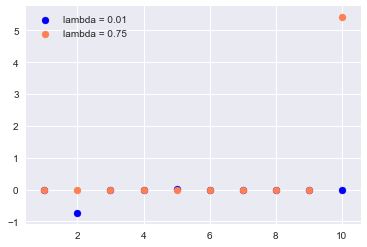

In [43]:
plt.scatter(range(1, 11), lasso_origparams_1, label='lambda = 0.01', color='blue')
plt.scatter(range(1, 11), lasso_origparams_2, label='lambda = 0.75', color='coral')
plt.legend()

plt.legend()
plt.show()